
<font color = 'black'>
<h4>*** pyHXExpress examples ***</h4> 
https://github.com/tuttlelm/pyHXExpress
<p>
Analysis of the test dataset GluFib_HI of known deuterium uptake mixtures, demonstrating the autonomous correct fitting of underlying populations. <br>
This analysis is presented in the pyHXExpress publication "A framework for the whole system multimodal HDX-MS analysis" by Tuttle, LM, Klevit, RE and Guttman, M


In [10]:
import os
import importlib
import hxex
import numpy as np, pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)
import GluFib_config as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()
#help(hxex)

hxex.config.SVG = True # save plots as vector graphics

hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)
print("Output will be saved to:\n",hxex.config.Output_DIR,"\n")

metadf = hxex.get_metadf()
filtered = hxex.filter_df(metadf,samples='GluFib_HI',quiet=False)
deut,raw = hxex.get_data(filtered) # get the peak picked data and raw data; used by hxex.plot_spectrum when specifying time points
#hxex.run_hdx_fits(filtered)

Output will be saved to:
 /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs 

Found 17 sample types with 24 total datasets to analyze.
Dataframe filtered to 1 from 24 total entries


Setting metadf to data in user supplied deutdata
Saving config parameters to 1pop/hdxms_params_22Jan2025.py



Dataset 5 ( 1 of 1 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2
Dataframe filtered to 53 from 53 total entries
Found time points (s): 0.0, 900.0, 1000000.0
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_22Jan2025


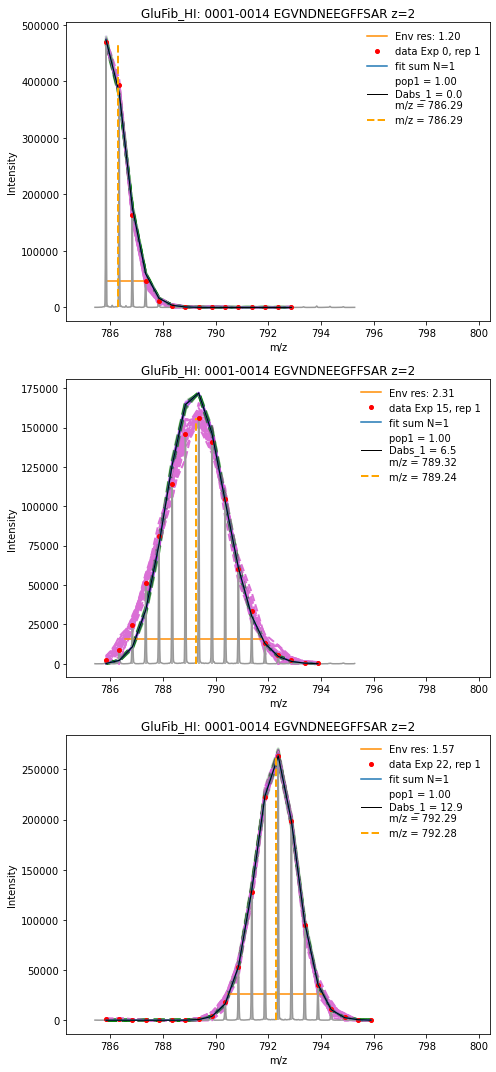

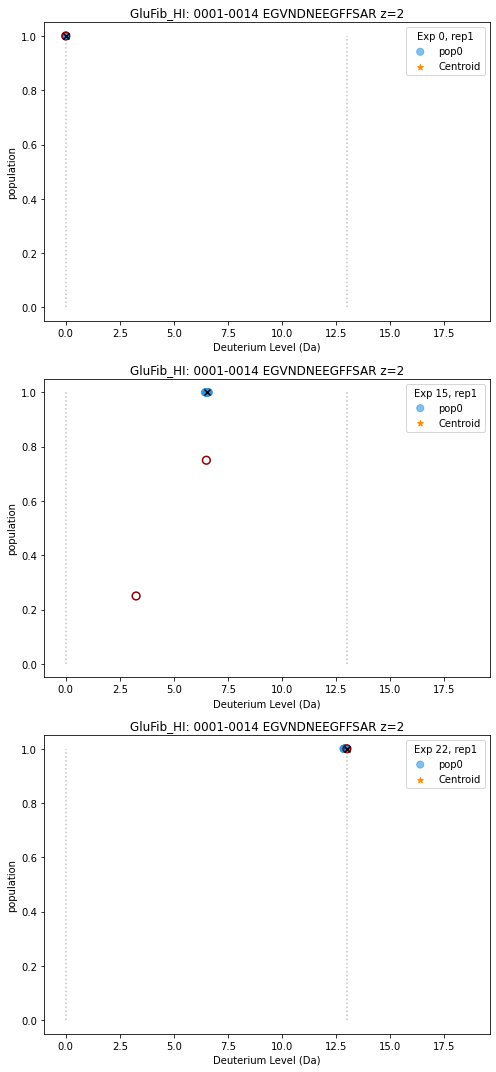

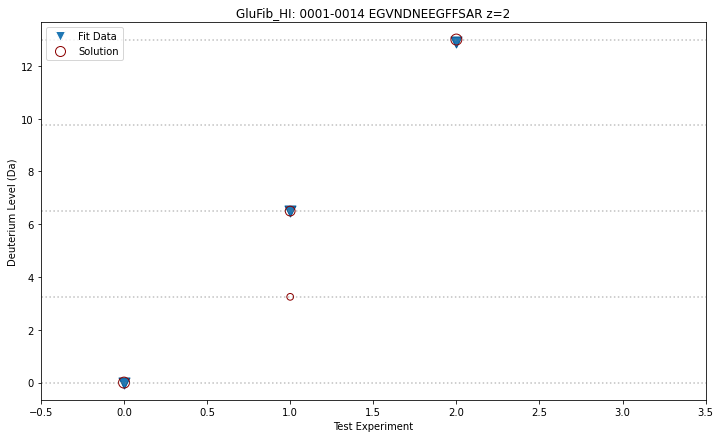

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_22Jan2025
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_22Jan2025
Saving results table to /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/1pop/data_fits22Jan2025.csv
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/1pop/GluFibHItp15_fix1popNB0.svg
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/1pop/GluFibHItp15_fix1pop.svg


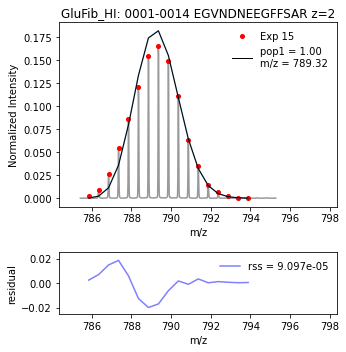

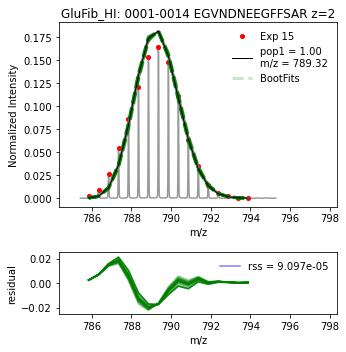

In [11]:
#Fixed 1 pop with residual plot
# timeidx 0 and 22 correspond to the UnDeut and FullDeut control samples, normalization is with respect to unimodal fits, regardless of Min/Max pops
hxex.config.Min_Pops = 1
hxex.config.Max_Pops = 1
hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs','1pop')
rax_kwargs = {'ymin':-0.025,'ymax':0.025}
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)

hxex.run_hdx_fits(filtered,hxex.filter_df(deut,timeidx=[0,15,22]))
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all[hxex.fitparams_all['nboot']==0],residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix1popNB0.svg')
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all,residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix1pop.svg')

Setting metadf to data in user supplied deutdata
Saving config parameters to 2pops/hdxms_params_22Jan2025.py



Dataset 5 ( 1 of 1 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2
Dataframe filtered to 53 from 53 total entries
Found time points (s): 0.0, 900.0, 1000000.0
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_22Jan2025


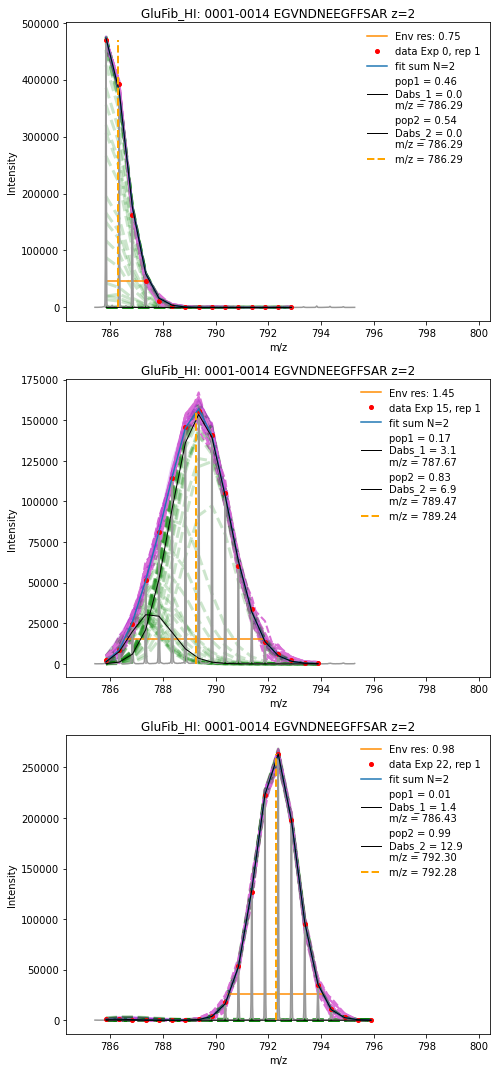

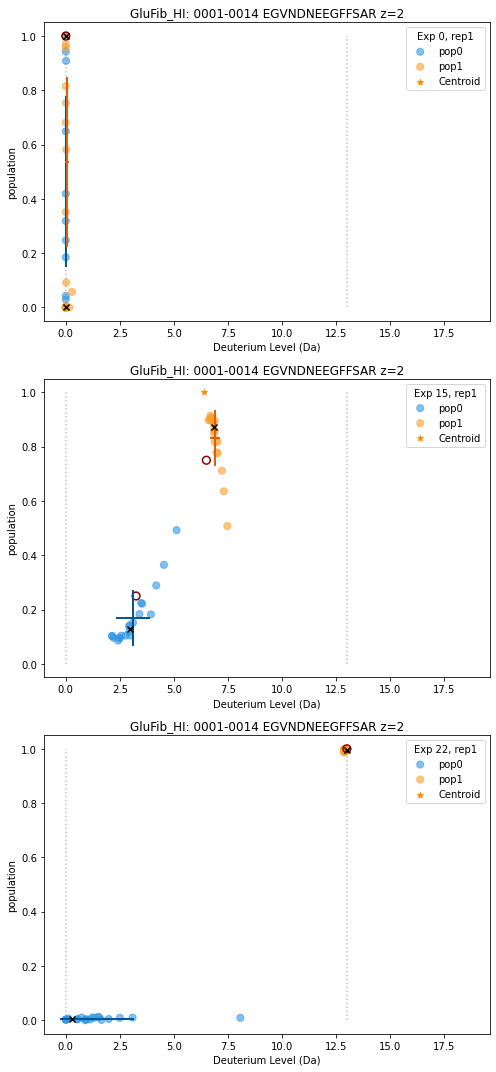

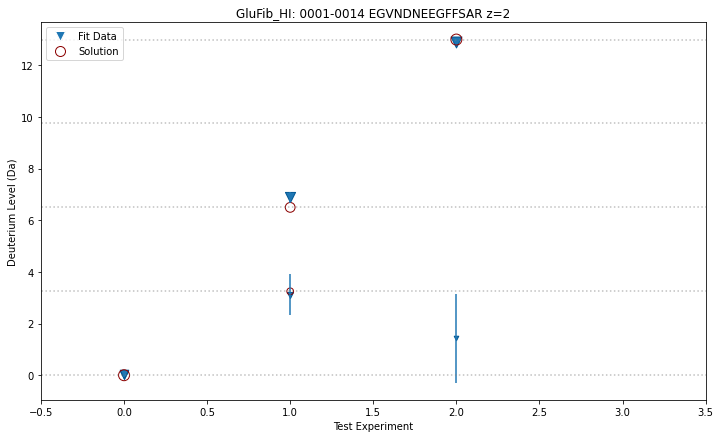

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_22Jan2025
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_22Jan2025
Saving results table to /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/2pops/data_fits22Jan2025.csv
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/2pops/GluFibHItp15_fix2popsNB0.svg
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/2pops/GluFibHItp15_fix2pops.svg


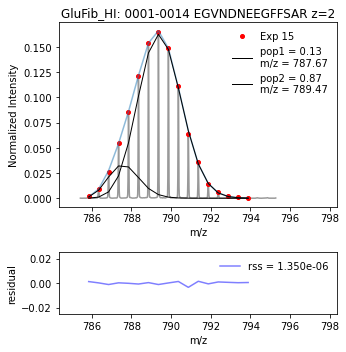

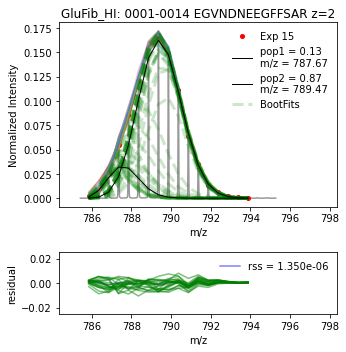

In [12]:
#Fixed 2 pops with residual plot
# Timeidx 0 and 22 correspond to the UnDeut and FullDeut control samples, normalization is with respect to unimodal fits, regardless of Min/Max pops
hxex.config.Min_Pops = 2
hxex.config.Max_Pops = 2
hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs','2pops')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)

hxex.run_hdx_fits(filtered,hxex.filter_df(deut,timeidx=[0,15,22]))
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all[hxex.fitparams_all['nboot']==0],residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix2popsNB0.svg')
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all,residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix2pops.svg')

Setting metadf to data in user supplied deutdata
Saving config parameters to 3pops/hdxms_params_22Jan2025.py



Dataset 5 ( 1 of 1 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2
Dataframe filtered to 53 from 53 total entries
Found time points (s): 0.0, 900.0, 1000000.0
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_22Jan2025


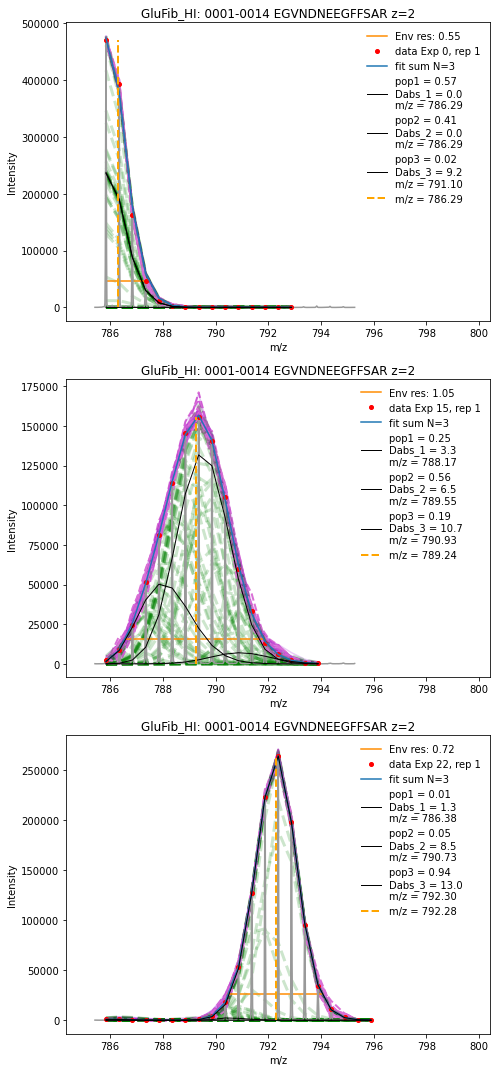

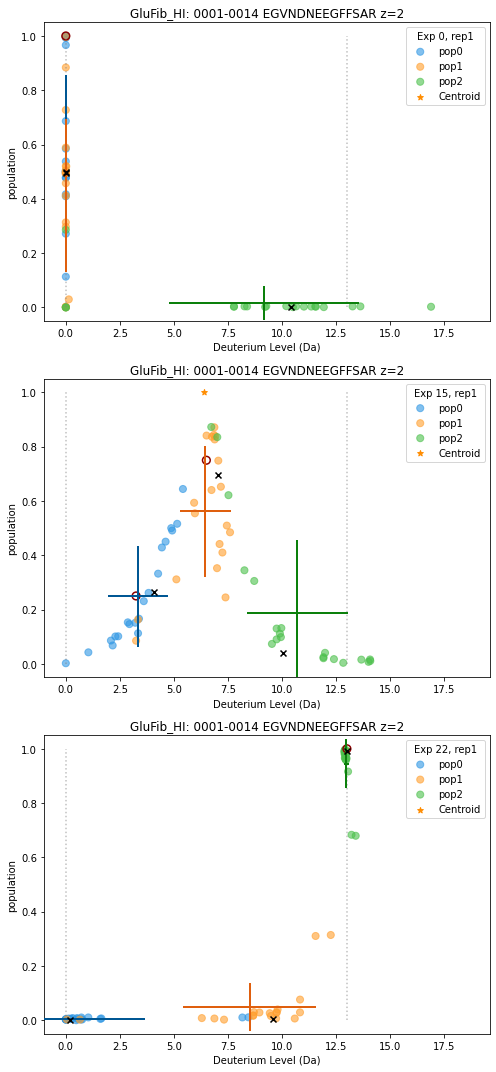

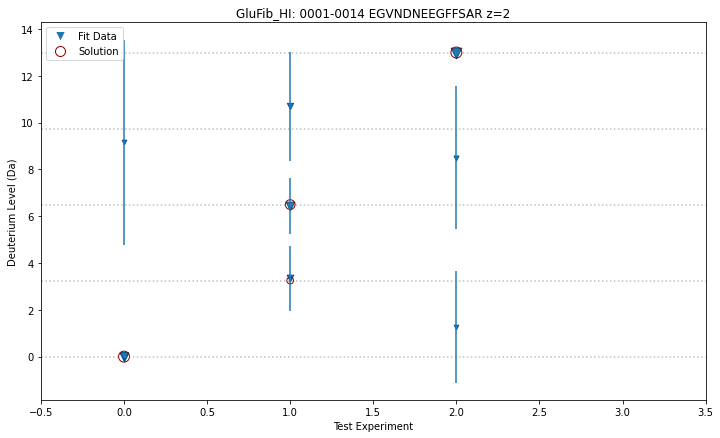

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_22Jan2025
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_22Jan2025
Saving results table to /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/3pops/data_fits22Jan2025.csv
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/3pops/GluFibHItp15_fix3popsNB0.svg
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/3pops/GluFibHItp15_fix3pops.svg


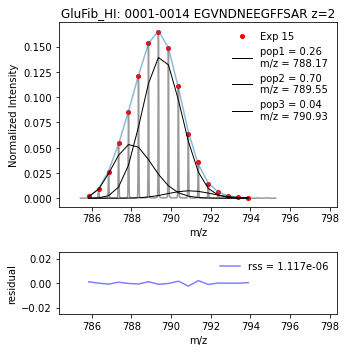

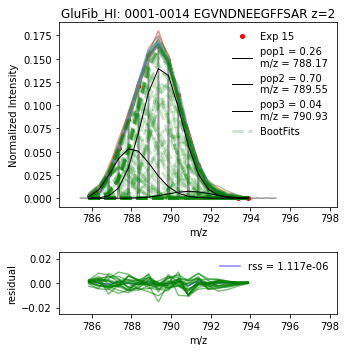

In [13]:
#Fixed 3 pops with residual plot
# Timeidx 0 and 22 correspond to the UnDeut and FullDeut control samples, normalization is with respect to unimodal fits, regardless of Min/Max pops
hxex.config.Min_Pops = 3
hxex.config.Max_Pops = 3
hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs','3pops')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)

hxex.run_hdx_fits(filtered,hxex.filter_df(deut,timeidx=[0,15,22]))

hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all[hxex.fitparams_all['nboot']==0],residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix3popsNB0.svg')
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all,residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_fix3pops.svg')

Setting metadf to data in user supplied deutdata
Saving config parameters to 1to4pops/hdxms_params_22Jan2025.py



Dataset 5 ( 1 of 1 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2
Dataframe filtered to 53 from 53 total entries
Found time points (s): 0.0, 900.0, 1000000.0
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_22Jan2025


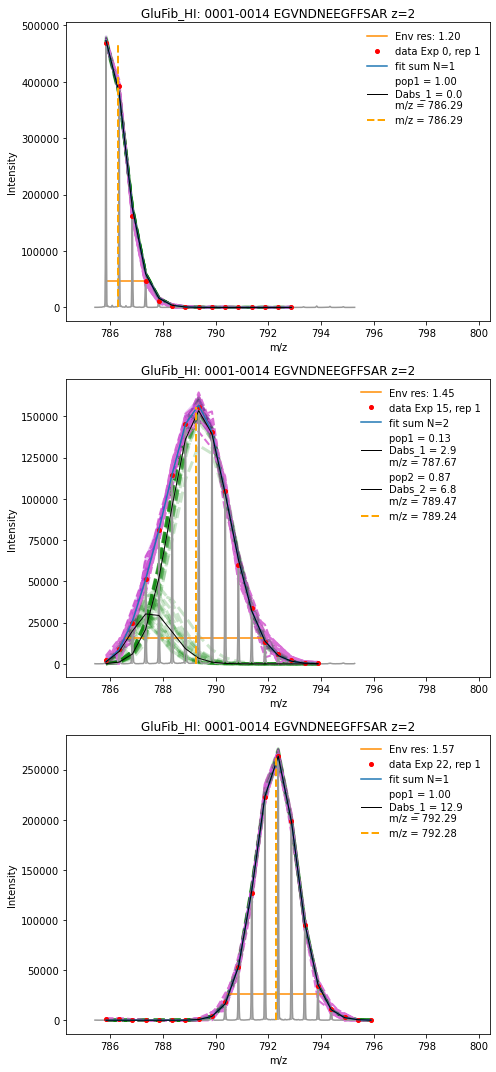

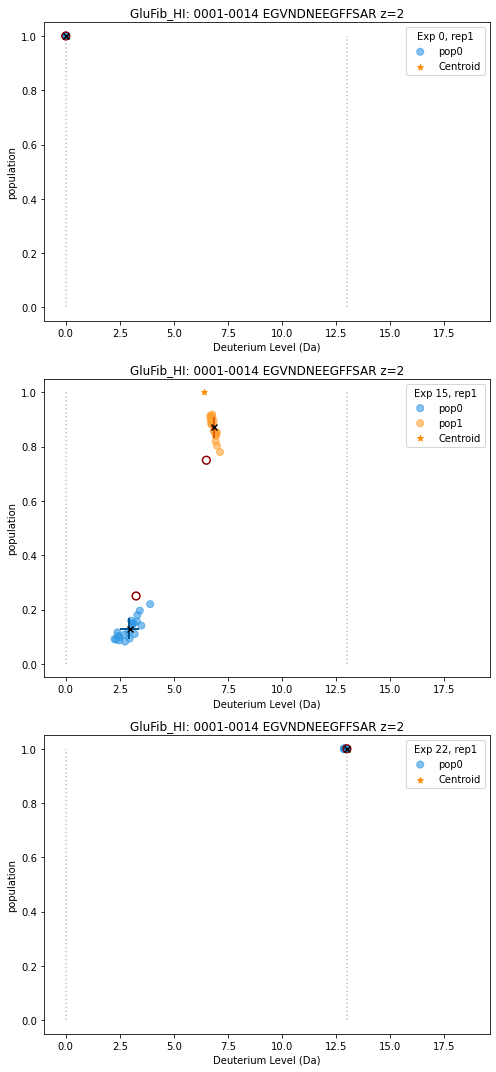

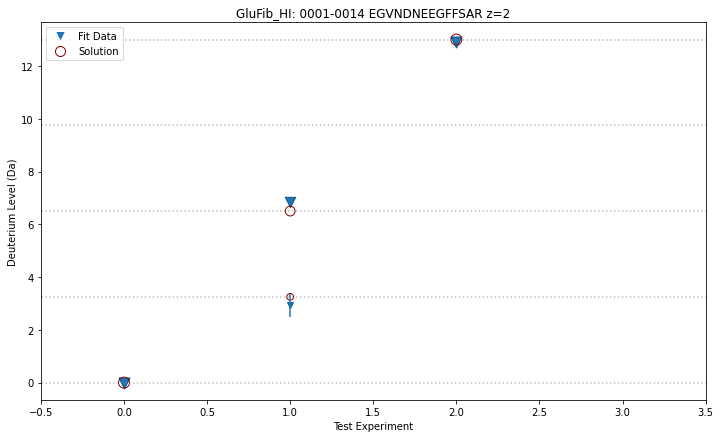

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_22Jan2025
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_22Jan2025
Saving results table to /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/1to4pops/data_fits22Jan2025.csv
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/1to4pops/GluFibHItp15_1to4pops.svg


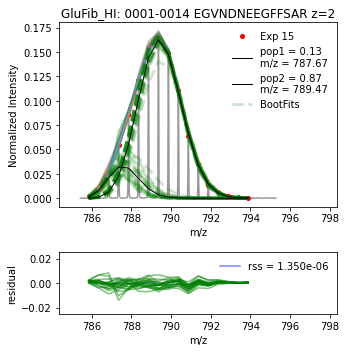

In [14]:
#pfit and min pop selected number of pops, with residual plot
hxex.config.Min_Pops = 1
hxex.config.Max_Pops = 4
hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs','1to4pops')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)

hxex.run_hdx_fits(filtered,hxex.filter_df(deut,timeidx=[0,15,22]))
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[15]),hxex.filter_df(raw,timeidx=[15]),hxex.fitparams_all,residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp15_1to4pops.svg')

Saving config parameters to GluFibHI_outputs/hdxms_params_22Jan2025.py



Dataset 5 ( 1 of 1 )
Performing fits for GluFib_HI 0001-0014: EGVNDNEEGFFSAR z=2


Found time points (s): 0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1000000.0
Time point: Exp 2 Rep: 1 Npops: 2           
min population below threshold: falling back to 1 curve(s)
Time point: Exp 16 Rep: 1 Npops: 3           
min population below threshold: falling back to 2 curve(s)
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_IndFits_22Jan2025


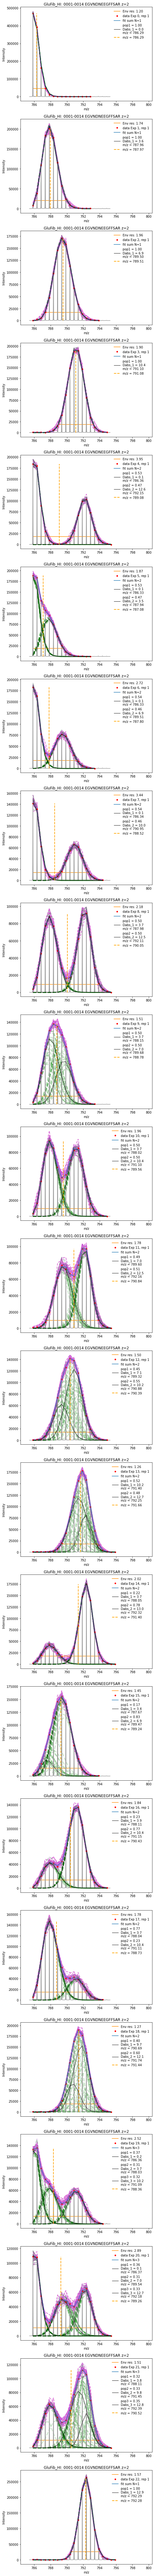

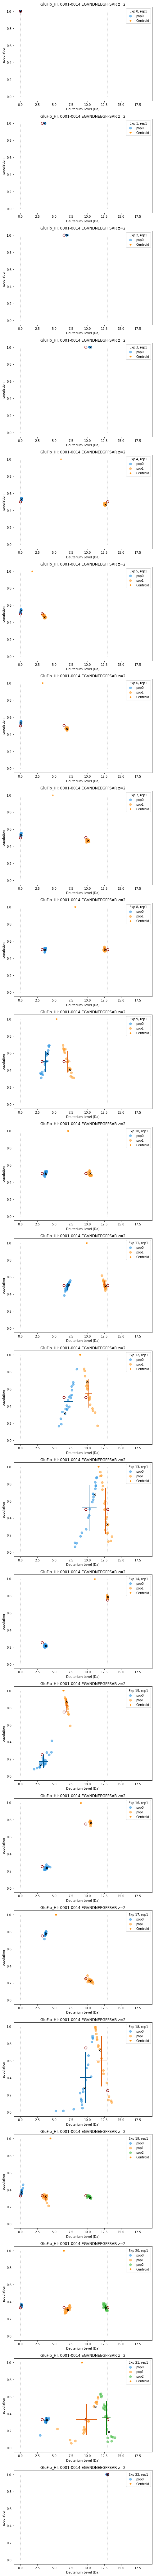

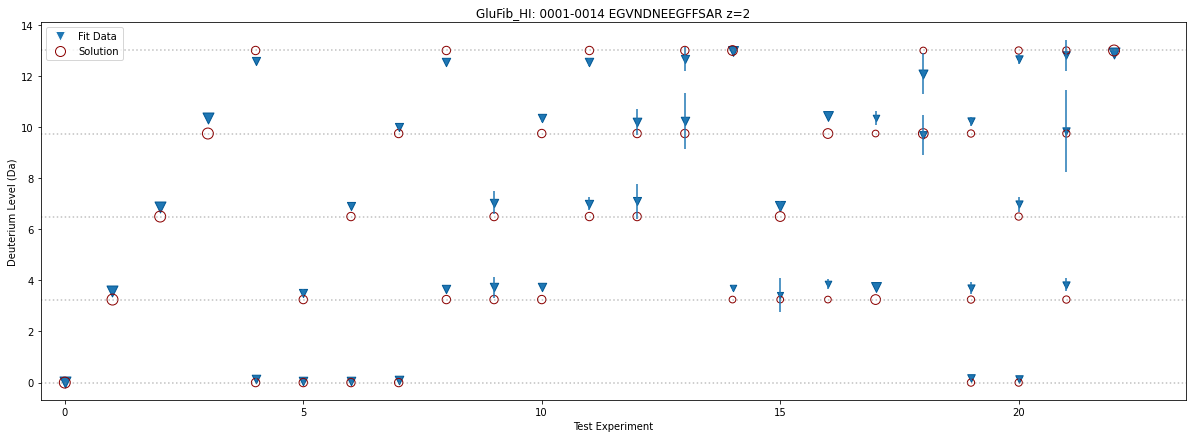

saving figure as  hxex_5_GluFib_HI_0001-0014_z2_BootFits_22Jan2025
saving figure as  hxex_5_GluFib_HI_0001-0014_z2_ndeutBoot_22Jan2025
Saving results table to /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/data_fits22Jan2025.csv


In [15]:
#run full dataset for GluFib_HI, allowing 1 to 4 populations
hxex.config.Min_Pops = 1
hxex.config.Max_Pops = 4
hxex.config.Output_DIR = os.path.join(os.getcwd(),'GluFibHI_outputs')
hxex.run_hdx_fits(filtered)

saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/GluFibHItp2_1to4popsNB0.svg
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/GluFibHItp8_1to4popsNB0.svg
saving figure as  /data/tuttle/HDX-MS/hxex_paper/GluFibHI_outputs/GluFibHItp20_1to4popsNB0.svg


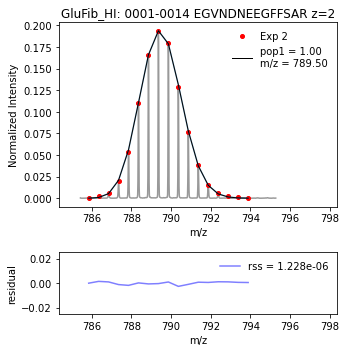

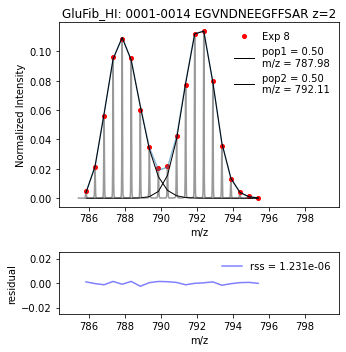

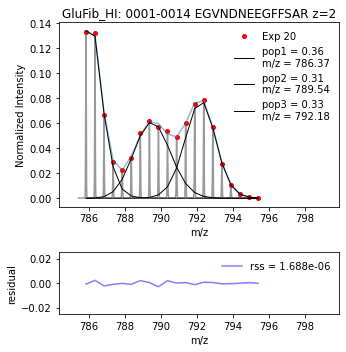

In [16]:
ncurves = hxex.fitparams_all[(hxex.fitparams_all['nboot']==1) & (hxex.fitparams_all['time_idx']==2)]['ncurves'].values[0]
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[2]),hxex.filter_df(raw,timeidx=[2]),hxex.fitparams_all[(hxex.fitparams_all['nboot']==0) & (hxex.fitparams_all['ncurves']==ncurves)],
                   residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp2_1to4popsNB0.svg')
ncurves = hxex.fitparams_all[(hxex.fitparams_all['nboot']==1) & (hxex.fitparams_all['time_idx']==8)]['ncurves'].values[0]
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[8]),hxex.filter_df(raw,timeidx=[8]),hxex.fitparams_all[(hxex.fitparams_all['nboot']==0) & (hxex.fitparams_all['ncurves']==ncurves)],
                   residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp8_1to4popsNB0.svg')
ncurves = hxex.fitparams_all[(hxex.fitparams_all['nboot']==1) & (hxex.fitparams_all['time_idx']==20)]['ncurves'].values[0]
hxex.plot_spectrum(hxex.filter_df(deut,timeidx=[20]),hxex.filter_df(raw,timeidx=[20]),hxex.fitparams_all[(hxex.fitparams_all['nboot']==0) & (hxex.fitparams_all['ncurves']==ncurves)],
                   residual=True,norm=True,rax_kwargs=rax_kwargs,saveas='GluFibHItp20_1to4popsNB0.svg')